# Residual Histogram
## Creating an histogram from each of the sarifo rtb time series
(time,qps_cap,qps_eff,avg_lat,max_lat,timeouts,bids)

Parsing data from safirortb.log

In [59]:
!./get_logs.sh 200000
!./parse_logs.sh
!ls ../data/

metric.csv  safirortb.log


In [60]:
import numpy as np
import os
from stats_util import Type, get_serie
import math

path = os.getcwd()
path 
dataset = np.loadtxt(path + "/../data/metric.csv", delimiter=",")
dataset = np.delete(dataset, [1,], axis=1)
dataset

array([[2.01812112e+13, 1.68000000e+02, 1.02000000e+02, ...,
        6.36700000e-01, 2.60000000e+01, 1.34000000e+02],
       [2.01812112e+13, 1.75000000e+02, 1.09000000e+02, ...,
        4.23000000e-01, 2.00000000e+01, 1.25000000e+02],
       [2.01812112e+13, 1.73000000e+02, 1.05000000e+02, ...,
        3.91800000e-01, 3.00000000e+01, 1.16000000e+02],
       ...,
       [2.01812112e+13, 2.43000000e+02, 1.16000000e+02, ...,
        1.05800000e-01, 5.00000000e+00, 1.69000000e+02],
       [2.01812112e+13, 2.46000000e+02, 1.13000000e+02, ...,
        9.42000000e-02, 7.00000000e+00, 1.81000000e+02],
       [2.01812112e+13, 2.17000000e+02, 1.12000000e+02, ...,
        1.91500000e-01, 2.20000000e+01, 1.47000000e+02]])

In [61]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=180, facecolor='w', edgecolor='k')
fn = get_serie(dataset, Type.qps_cap, None, None)

<Figure size 2700x1260 with 0 Axes>

(254.08125577100645, 54.886661106302576)

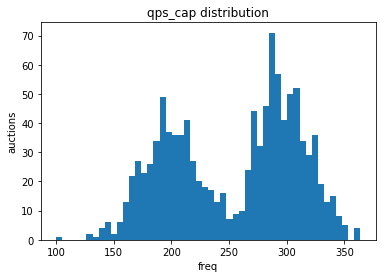

In [62]:
plt.hist(fn,bins=50)
plt.title('qps_cap distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(103.25669436749769, 17.97912606647901)

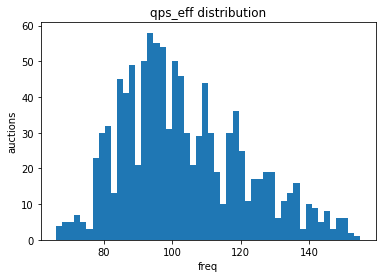

In [63]:
fn = get_serie(dataset, Type.qps_eff, None, None)
plt.hist(fn,bins=50)
plt.title('qps_eff distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(0.004139242843951985, 0.0010051952668964318)

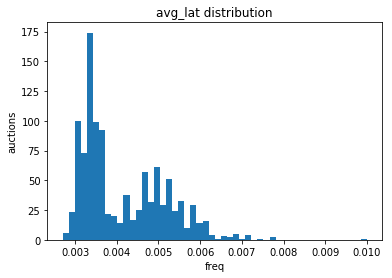

In [64]:
fn = get_serie(dataset, Type.avg_lat, None, None)
plt.hist(fn,bins=50)
plt.title('avg_lat distribution')
plt.xlabel('freq')
plt.ylabel('auctions');
fn.mean(),math.sqrt(fn.var())

(157.4921514312096, 28.97505348019582)

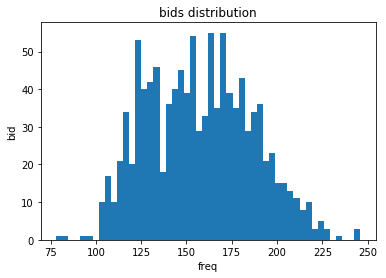

In [65]:
fn = get_serie(dataset, Type.bids, None, None)
plt.hist(fn,bins=50)
plt.title('bids distribution')
plt.xlabel('freq')
plt.ylabel('bid');
fn.mean(),math.sqrt(fn.var())

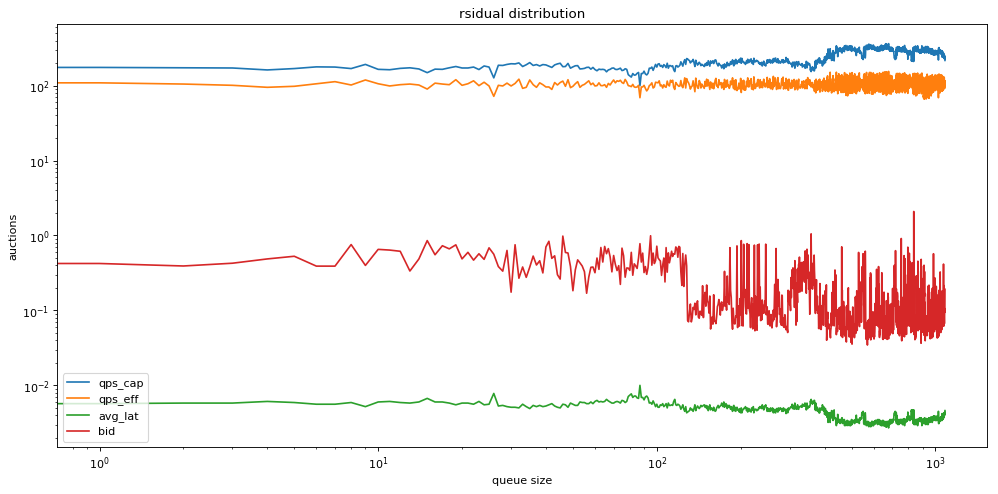

In [66]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(dataset[:,1], label="qps_cap")
plt.plot(dataset[:, 2], label="qps_eff")
plt.plot(dataset[:, 3], label="avg_lat")
plt.plot(dataset[:, 4], label="bid")

#plt.hist(dataset,bins=50)
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('rsidual distribution')
plt.xlabel('queue size')
plt.ylabel('auctions');
plt.legend()
plt.show()